<a href="https://colab.research.google.com/github/mauro-nievoff/Procesamiento-de-Imagenes/blob/main/TP3_Nievas_Offidani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 3 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

In [27]:
def mostrar_graficos(imagen, titulo):

  _, axes = plt.subplots(1, 2, figsize=(15,5))
  axes[0].imshow(imagen, 'gray', vmin=0, vmax=1)
  plot_hist(imagen, 50, axes[1])
  plt.suptitle(titulo, fontsize = 'x-large', y = 0.95)

In [25]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

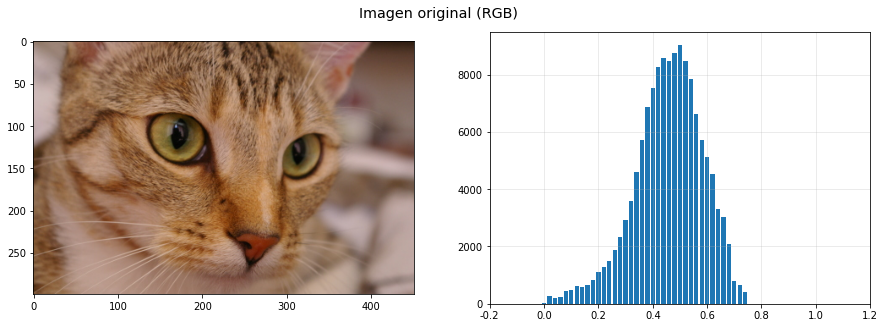

In [28]:
mostrar_graficos(img_rgb, 'Imagen original (RGB)')

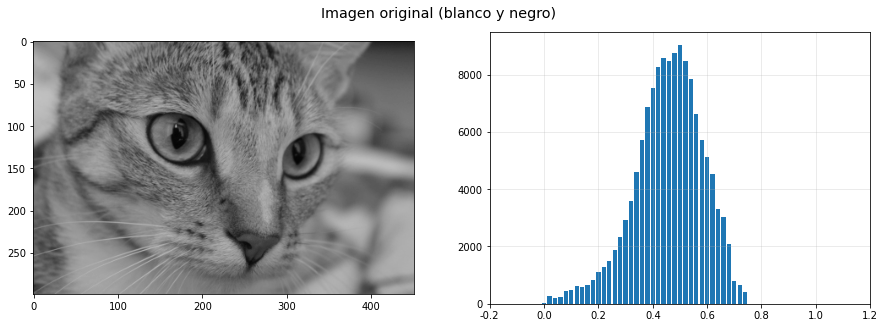

In [29]:
mostrar_graficos(img_gray, 'Imagen original (blanco y negro)')

# 1. Normalizar histograma al rango [0,1]

Definir una función que normalice el histograma de valores de la imagen al rango [0,1]. Si la imagen es RGB, debe normalizar el histograma de luminancias.

In [30]:
def normalizar_imagen(imagen):

  if len(imagen.shape) == 3:

    imagen_yiq = rgb2yiq(imagen)

    y = imagen_yiq[:,:,0]

  else:

    y = imagen

  ymin = y.min()

  ymax = y.max()

  y_normalizado = (y - ymin) / (ymax - ymin)

  if len(imagen.shape) == 3:

    imagen_yiq[:,:,0] = y_normalizado

    nueva_imagen = np.clip(yiq2rgb(imagen_yiq), 0, 1)

  else:

    nueva_imagen = y_normalizado

  return nueva_imagen

In [64]:
img_rgb_normalizada = normalizar_imagen(img_rgb)

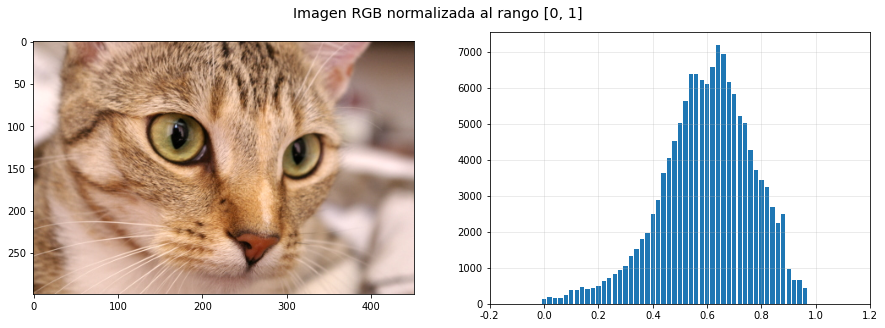

In [31]:
mostrar_graficos(img_rgb_normalizada, 'Imagen RGB normalizada al rango [0, 1]')

In [32]:
img_gray_normalizada = normalizar_imagen(img_gray)

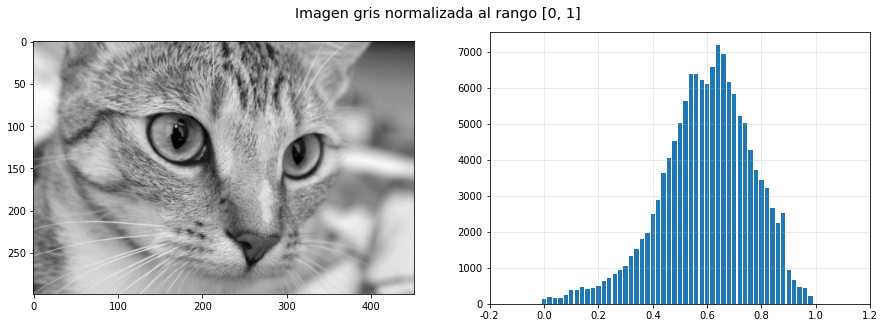

In [33]:
mostrar_graficos(img_gray_normalizada, 'Imagen gris normalizada al rango [0, 1]')

## 1.1 Normalizar histograma usando percentiles

Definir una función que normalice el histograma de valores de la imagen de modo que el pixel del percentil P valga 0 y el pixel del percentil 100-P valga 1. Los valores entre los percentiles 0 y P valdrán 0 y los valores entre los percentiles 100-P y 100 valdrán 1. Si la imagen es RGB, normalizar el histograma de luminancias.

NOTA: para calcular percentiles usar np.percentile()

In [34]:
def normalizar_con_percentil(imagen, percentil):

  import copy

  if percentil > 50:

    raise ValueError("El valor de percentil debe ser menor o igual a 50.")

  if len(imagen.shape) == 3:

    imagen_yiq = rgb2yiq(imagen)

    y = imagen_yiq[:,:,0]

  else:

    y = copy.deepcopy(imagen) # Para no modificar el original al normalizar.

  ymin = np.percentile(y, percentil)

  ymax = np.percentile(y, (100 - percentil))

  y[y <= ymin] = 0

  y[y > ymax] = 1

  if len(imagen.shape) == 3:

    imagen_yiq[:,:,0] = y

    nueva_imagen = np.clip(yiq2rgb(imagen_yiq), 0, 1)

  else:

    nueva_imagen = y

  return nueva_imagen

In [35]:
img_rgb_normalizada_2 = normalizar_con_percentil(img_rgb, 20)

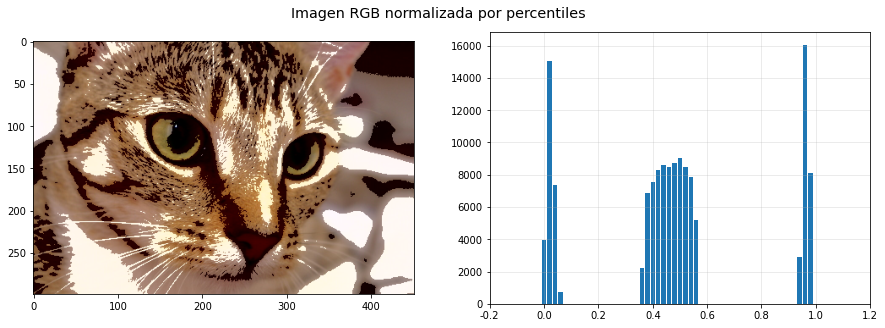

In [36]:
mostrar_graficos(img_rgb_normalizada_2, 'Imagen RGB normalizada por percentiles')

In [37]:
img_gray_normalizada_2 = normalizar_con_percentil(img_gray, 20)

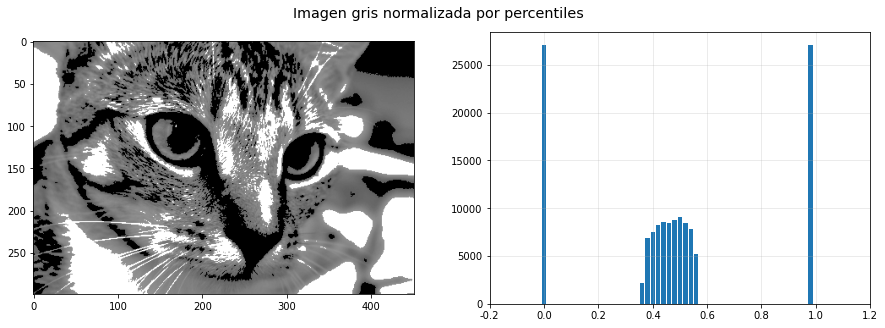

In [38]:
mostrar_graficos(img_gray_normalizada_2, 'Imagen gris normalizada por percentiles')

## 2. Corrección gamma

1. Definir una función que aplique la corrección gamma a una imagen. Si la imagen es RGB, debe aplicar la corrección sobre la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] (con min y max o con percentiles) y luego aplicar corrección gamma.


Como sugerencia, pasarle como parámetro un valor $\alpha$ de manera que $\gamma$ se calcule como:

$\gamma = 2^{-\alpha}$

De esta manera, cuando $\alpha=1 \rightarrow \gamma=1/2$, y cuando $\alpha=-1 \rightarrow \gamma=2$. Entonces, para $\alpha>0$ la luminosidad aumenta y para $\alpha<0$ disminuye.

In [39]:
def correccion_gamma(imagen, alfa):

  imagen_normalizada = normalizar_imagen(imagen)

  if len(imagen.shape) == 3:

    imagen_yiq = rgb2yiq(imagen_normalizada)

    y = imagen_yiq[:,:,0]

  else:

    y = imagen_normalizada

  gamma = 2 ** (-1 * alfa)

  y_corregida = y ** gamma

  if len(imagen.shape) == 3:

    imagen_yiq[:,:,0] = y_corregida

    nueva_imagen = np.clip(yiq2rgb(imagen_yiq), 0, 1)

  else:

    nueva_imagen = y_corregida

  return nueva_imagen

In [40]:
# Creo una versión más oscura y una más clara para cada imagen.

img_rgb_normalizada_3_a = correccion_gamma(img_rgb, alfa = -2)
img_rgb_normalizada_3_b = correccion_gamma(img_rgb, alfa = 2)

img_gray_normalizada_3_a = correccion_gamma(img_gray, alfa = -2)
img_gray_normalizada_3_b = correccion_gamma(img_gray, alfa = 2)

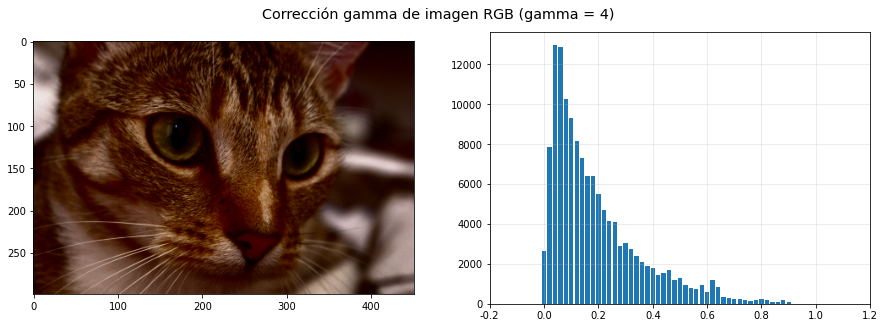

In [41]:
mostrar_graficos(img_rgb_normalizada_3_a, 'Corrección gamma de imagen RGB (gamma = 4)')

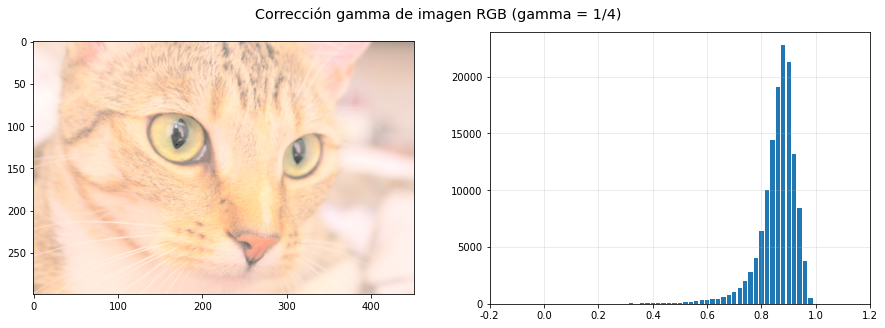

In [42]:
mostrar_graficos(img_rgb_normalizada_3_b, 'Corrección gamma de imagen RGB (gamma = 1/4)')

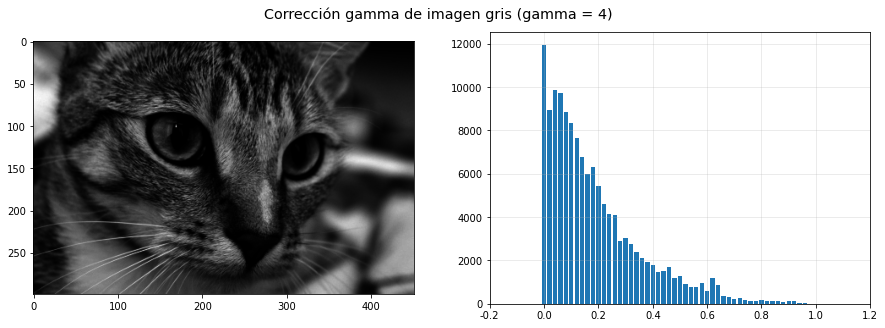

In [43]:
mostrar_graficos(img_gray_normalizada_3_a, 'Corrección gamma de imagen gris (gamma = 4)')

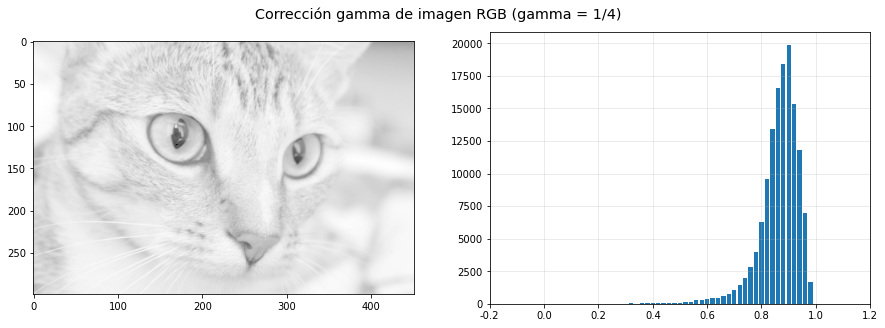

In [44]:
mostrar_graficos(img_gray_normalizada_3_b, 'Corrección gamma de imagen RGB (gamma = 1/4)')

# 3. Modificación del histograma por una función definida a tramos

1. Definir una función que tome una imagen y dos arreglos $x$ e $y$ que definan una función no-lineal en el rango $0\leq x,y\leq 1$ y aplique la función a la intensidad de los pixeles de la imagen. Si la imagen es RGB debe aplicar la función a la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] y luego aplicar corrección gamma.

Ayuda: La función np.interp() puede facilitarle la tarea

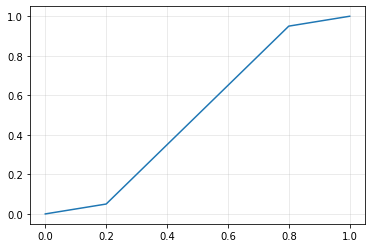

In [45]:
x = np.array([0, 0.2,  0.8,  1])
y = np.array([0, 0.05, 0.95, 1])

plt.plot(x, y)
plt.grid(alpha=0.3)

In [46]:
def correccion_por_tramos(imagen, array_x, array_y):

  # Chequeo que los arrays introducidos estén dentro del intervalo [0, 1]

  if ((0 <= array_x.min()) & (0 <= array_y.min()) & (array_x.max() <= 1) & (array_y.max() <= 1)).all() == False:

    raise ValueError("Los arrays incluyen valores por fuera del intervalo permitido ([0, 1])")

  imagen_normalizada = normalizar_imagen(imagen)

  if len(imagen.shape) == 3:

    imagen_yiq = rgb2yiq(imagen_normalizada)

    y = imagen_yiq[:,:,0]

  else:

    y = imagen_normalizada

  y_corregida = np.interp(y, xp = array_x, fp = array_y)

  if len(imagen.shape) == 3:

    imagen_yiq[:,:,0] = y_corregida

    nueva_imagen = np.clip(yiq2rgb(imagen_yiq), 0, 1)

  else:

    nueva_imagen = y_corregida

  return nueva_imagen

In [47]:
img_rgb_normalizada_4 = correccion_por_tramos(img_rgb, x, y)

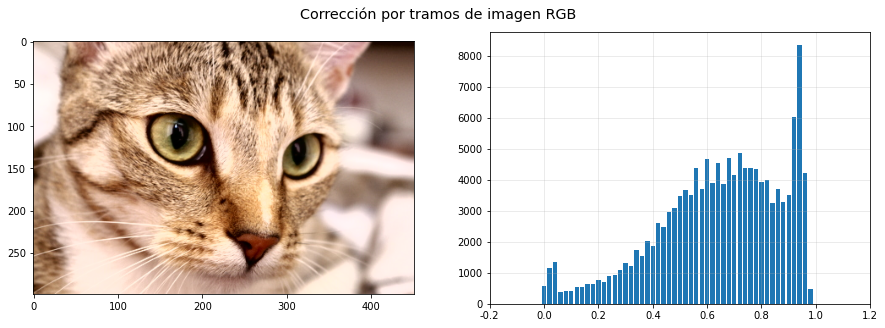

In [48]:
mostrar_graficos(img_rgb_normalizada_4, 'Corrección por tramos de imagen RGB')

In [49]:
img_gray_normalizada_4 = correccion_por_tramos(img_gray, x, y)

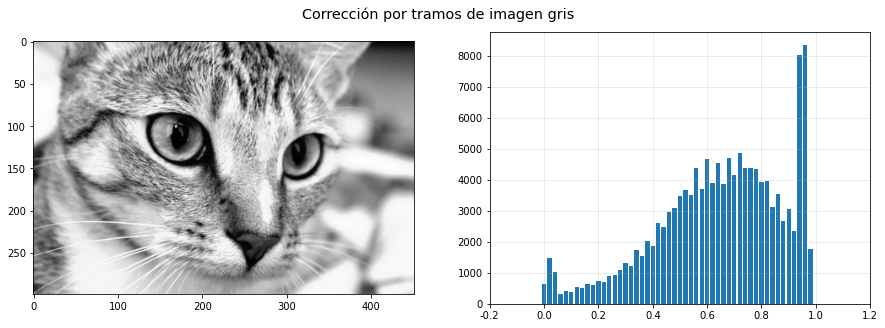

In [50]:
mostrar_graficos(img_gray_normalizada_4, 'Corrección por tramos de imagen gris')

# 4. Uniformalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución uniforme. 
2. Normalizar el histograma al rango [0,1] y uniformalizar su distribución

In [57]:
def uniformalizar_histograma(imagen):

  imagen_normalizada = normalizar_imagen(imagen)

  if len(imagen.shape) == 3:

    imagen_yiq = rgb2yiq(imagen_normalizada)

    y = imagen_yiq[:,:,0]

  else:

    y = imagen_normalizada

  counts, borders = np.histogram(y, bins=50, range=(0,1))

  array_xp = np.arange(0,50)/49 # 50 por la cantidad de bins.

  array_fp = np.cumsum(counts) / np.sum(counts)

  y_corregida = np.interp(y, xp = array_xp, fp = array_fp)

  if len(imagen.shape) == 3:

    imagen_yiq[:,:,0] = y_corregida

    nueva_imagen = np.clip(yiq2rgb(imagen_yiq), 0, 1)

  else:

    nueva_imagen = y_corregida

  return nueva_imagen

In [58]:
img_rgb_uniforme = uniformalizar_histograma(img_rgb)

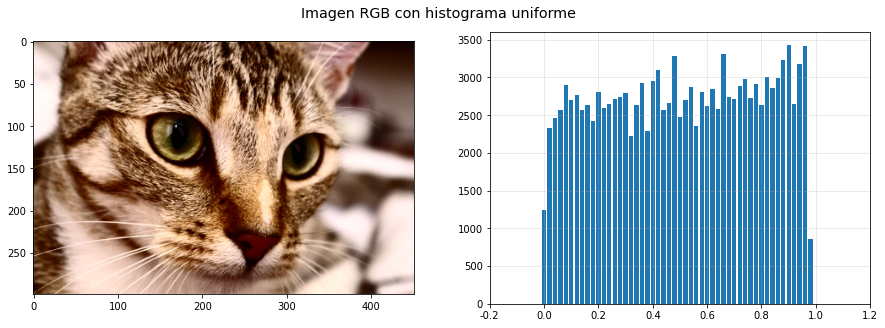

In [59]:
mostrar_graficos(img_rgb_uniforme, 'Imagen RGB con histograma uniforme')

In [60]:
img_gray_uniforme = uniformalizar_histograma(img_gray)

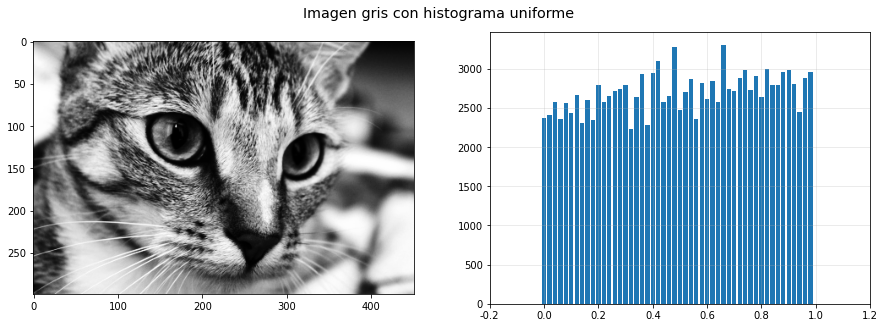

In [61]:
mostrar_graficos(img_gray_uniforme, 'Imagen gris con histograma uniforme')

# 5. Normalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución normal. 
2. Normalizar el histograma al rango [0,1] y normalizar su distribución.

In [56]:
from scipy.stats import norm

In [62]:
def normalizar_histograma(imagen, desvio_estandar):

  imagen_normalizada = normalizar_imagen(imagen)

  if len(imagen.shape) == 3:

    imagen_yiq = rgb2yiq(imagen_normalizada)

    y = imagen_yiq[:,:,0]

  else:

    y = imagen_normalizada

  counts, borders = np.histogram(y, bins=50, range=(0,1))

  array_xp = np.arange(0,50)/49
  array_fp = norm.ppf((np.cumsum(counts) / np.sum(counts)), loc = 0.5, scale = desvio_estandar)

  y_corregida = np.interp(y, xp = array_xp, fp = array_fp)

  if len(imagen.shape) == 3:

    imagen_yiq[:,:,0] = y_corregida

    nueva_imagen = np.clip(yiq2rgb(imagen_yiq), 0, 1)

  else:

    nueva_imagen = y_corregida

  return nueva_imagen

In [65]:
img_rgb_normal = normalizar_histograma(img_rgb, 0.2)

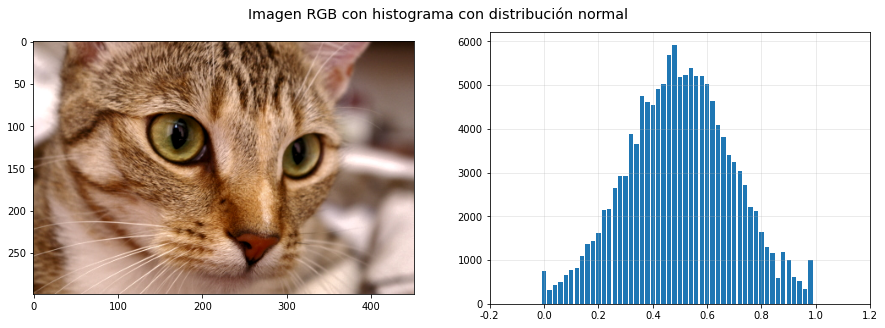

In [66]:
mostrar_graficos(img_rgb_normal, 'Imagen RGB con histograma con distribución normal')

In [67]:
img_gray_normal = normalizar_histograma(img_gray, 0.2)

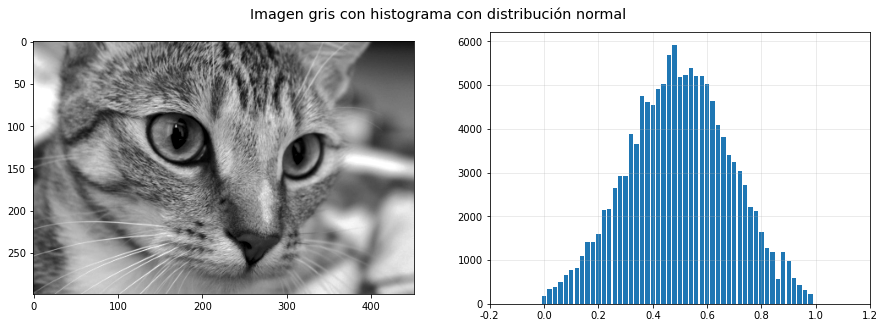

In [68]:
mostrar_graficos(img_gray_normal, 'Imagen gris con histograma con distribución normal')